In [1]:
import numpy as np
from gridworldv2 import GridworldV2Env
from value_function_utils import (
    visualize_grid_action_values,
    visualize_grid_state_values,
)

===Monte Carlo Prediction===


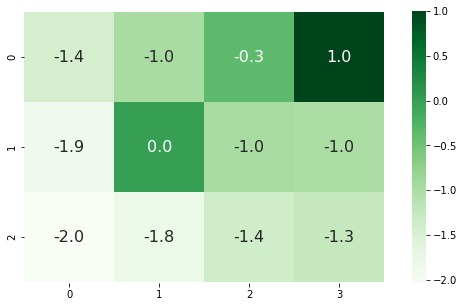

In [8]:
def monte_carlo_prediction(env,max_episodes):
    grid_state_values = np.zeros(len(env.distinct_states))
    grid_state_values[env.goal_state]=1
    grid_state_values[env.bomb_state]=-1
    gamma = 0.99
    result = {state:[] for state in env.distinct_states}
    for e in range(max_episodes):
        g_t=0

        done = False
        env.reset()
        trajectory=[]
        while not done:
            action = env.action_space.sample()
            state,reward,done = env.step(action)
            trajectory.append((state,reward))
        
        for idx,(state,reward) in enumerate(trajectory[::-1]):
            g_t = reward+gamma*g_t

            if state not in np.array(trajectory[::-1])[:,0][idx+1:]:
                result[str(state)].append(g_t)
                grid_state_values[state] = np.mean(result[str(state)])
    visualize_grid_state_values(grid_state_values.reshape((3, 4)))            

max_episodes = 4000
env = GridworldV2Env(step_cost=-0.1, max_ep_length=30)
print(f"===Monte Carlo Prediction===")
monte_carlo_prediction(env, max_episodes)


In [ ]:
def epsilon_greedy_policy(action_logit,epsilon=0.2):
    idx = np.argmax(action_logit)
    epsilon_decay = np.sqrt(sum([a**2 for a in action_logit]))

    if(epsilon_decay==0.0):
        epsilon_decay=1.0
    
    prob=[]

    for i,a in enumerate(action_logit):
        if i==idx:
            prob.append(np.round(1-epsilon+epsilon/epsilon_decay,3))
        else:
            prob.append(np.round(epsilon/epsilon_decay,3))
    
    residual_error = sum(prob)-1

    return np.array(prob) - residual_error/len(action_logit)




def monte_carlo_control(env,max_episodes):
    grid_state_action_value = np.zeros((len(env.distinct_states),4))
    grid_state_action_value[env.goal_state,:]=1
    grid_state_action_value[env.bomb_state,:]=-1
    gamma = 0.99        
    rewards = {}
    for e in max_episodes:
        g_t=0
        done = False
        state = env.reset()
        trajectory=[]

        while not done:
            probs = epsilon_greedy_policy(grid_state_action_value[state])
            action = np.random.choice(np.arange(4),probs)
            state,reward,done = env.step(action)
            trajectory.append((state,action,reward))
        
        for state,action,reward in reversed(trajectory):
            gt = gt*gamma + reward
            rewards[str(state)+"-"+str(action)] = 
            
            

